# Counter-measure COVID Outbreak

## Objective

**Business rationale** - As members of the Health Ministry, the challenge is to propose strategies to save both people and the economy given to COVID-19 outbreak. While limiting the diffusion of the virus, our aim is to preserve business. In this report we propose strategies  to the management department director, and measure their efficiency with key indicators. The objective is to enable him/her to make decisions, and then he/she will convince, in turn, the Health Minister and the President de la République himself.

## Prepare the environment

### Import the libraries

General purpose libraries.

[NetworkX Documentation](https://networkx.github.io/documentation/stable/reference/index.html)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from datetime import datetime
import subprocess
import sys
import os

Import NDlib library to simulate an epidemic model.

UNUSED ALTERNATIVE DIFUSSION SIM LIBRARY - KEPT FOR REFERENCE

[NDlib Documentation](https://ndlib.readthedocs.io/en/latest/index.html)

In [2]:
# try:
#     import ndlib.models.epidemics as ep
# except:
#     subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'ndlib'])
#     import ndlib.models.epidemics as ep

Import EoN library to simulate an epidemic model.

[EoN Documentation](https://epidemicsonnetworks.readthedocs.io/en/latest/GettingStarted.html)

In [3]:
try:
    import EoN
except:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'EoN'])
    import EoN

### Import the data

Clone repository

In [4]:
# Clone the repo containing the network data

!git clone -l -s https://github.com/mikeguzman1294/SocialNetworkAnalysis.git cloned-repo

fatal: destination path 'cloned-repo' already exists and is not an empty directory.


In [5]:
# Move to the relative path containing the data

%cd cloned-repo/challenge_2/
!ls

/content/cloned-repo/challenge_2
'1 Households hypothetical dataset.ipynb'   graph.gexf	     readme.md
'2 Contacts.ipynb'			    processed-data   readme.pdf
'3 Create graphs.ipynb'			    raw-data


Load the population graph

In [6]:
# Load the graph
# The graph is generated from population tabular datasets
G = nx.read_gexf("graph.gexf")

In [7]:
# # WORKAROUND FOR TESTING WITH RANDOM PREFERNTIAL ATTACHMENT GRAPH

# n = 10044 #Number of nodes
# m = 10 # Number of edges to attach from a new node to existing nodes

# # Create random graph using Barabási–Albert preferential attachment
# G = nx.barabasi_albert_graph(n, m)

Load the processed csv files and convert them into Pandas Dataframes.

Processed Adult Contacts Dataset

In [8]:
df_adults = pd.read_csv('processed-data/pro_contacts_adults.csv')
df_adults.head()

,household_id,adult_id,job_cat,pro_contacts,company_id
0,0,0,Indus_other,52,6.0
1,0,1,Hotel_Restaurant,114,21.0
2,1,2,Shops_other,14,45.0
3,1,3,Administration_schools,33,10.0
4,2,4,Services_other,770,34.0


Check for null values in job_cat representing unemployed nodes.

In [9]:
# Check for any null values (unemployment)

print(f'Null Values per Feature\n{df_adults.isnull().sum()}\n')

Null Values per Feature
household_id       0
adult_id           0
job_cat         2297
pro_contacts       0
company_id      2297
dtype: int64



Processed Children Contacts Dataset

In [10]:
df_children = pd.read_csv('processed-data/pro_contacts_children.csv')
df_children.head()

,household_id,child_id,school_contacts,school_id
0,0,6960,35,2
1,0,6961,58,6
2,1,6962,92,5
3,3,6963,25,9
4,3,6964,85,1


Processed Households Dataset

In [11]:
df_households = pd.read_csv('processed-data/households.csv')
df_households.tail()

,Unnamed: 0,nb_children,nb_adults,type,size
3797,3797,0,1,leaving_alone,1
3798,3798,0,1,leaving_alone,1
3799,3799,0,1,leaving_alone,1
3800,3800,0,1,leaving_alone,1
3801,3801,0,1,leaving_alone,1


## Exploratory analysis


### Graph Exploration


Basic information of the graph.

In [12]:
# Networkx short summary of information for the graph G
print(G)

Graph with 9699 nodes and 1244291 edges


Plot the degree of the last node as a sanity check.

In [13]:
# Degree of the last node
G.degree('10044')

107

Plot the degree distribution.

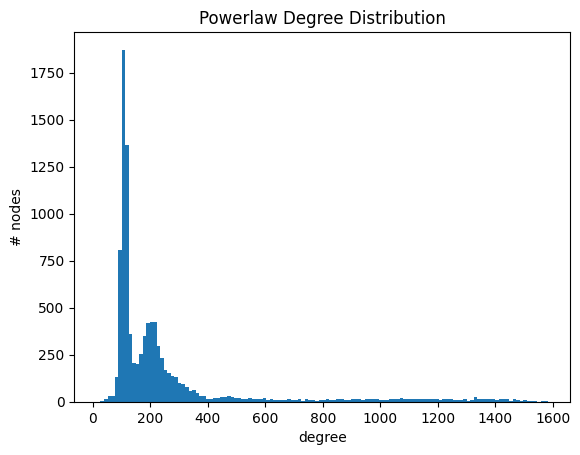

In [14]:
# Draw the degree distribution. If powerlow distribution, the graph shows one of the properties
# of a real (complex) network, such as social networks, biological networks, internet networks.

plt.figure(num=None)
fig = plt.figure(1)
degree_sequence=[d for n, d in G.degree()] # degree sequence
plt.hist(degree_sequence, bins='auto')  
plt.title("Powerlaw Degree Distribution")
plt.ylabel("# nodes")
plt.xlabel("degree")
plt.show()
pylab.close()
del fig

## Create Graph Variants

In this section we apply isolation policies to the base graph G where we remove influential nodes that could accelerate the COVID diffusion in the population. We make a copy of the modified G for each policy.*texto en cursiva*

### Detect Hubs

First seek to detect the most influent nodes in the popccording to different centrality measures.

Given a percentage of the population to isolate, we compute a determined number of most influential individuals per centrality measure.

In [15]:
# Percentage of the population to isolate at an early stage
isolation_percentage = 0.05

isolated_nodes = int( G.number_of_nodes() * isolation_percentage )
print(f'Number of nodes to isolate: {isolated_nodes}')

Number of nodes to isolate: 484


#### Degree
The Degree Centrality algorithm can be used to find popular nodes within a graph. Degree centrality measures the number of incoming or outgoing (or both) relationships from a node, depending on the orientation of a relationship projection.

It can be applied to either weighted or unweighted graphs. In the weighted case the algorithm computes the sum of all positive weights of adjacent relationships of a node, for each node in the graph. Non-positive weights are ignored.

Find the highest degree node and its degree.

In [16]:
highest_degree_node = max(G.nodes, key=G.degree)
print(f'The highest degree node is: {highest_degree_node} with a degree of {G.degree(highest_degree_node)} neighbors.')

The highest degree node is: 6 with a degree of 1582 neighbors.


Nodes with higher degree.

In [17]:
degree_list = sorted(G.degree, key=lambda x: x[1], reverse=True)
print(len(degree_list))
degree_list[:isolated_nodes]

9699


[('6', 1582),
 ('2636', 1572),
 ('1412', 1569),
 ('2170', 1569),
 ('2925', 1567),
 ('63', 1563),
 ('1296', 1561),
 ('2696', 1556),
 ('1694', 1544),
 ('1826', 1540),
 ('42', 1539),
 ('1544', 1534),
 ('1747', 1534),
 ('912', 1532),
 ('2772', 1529),
 ('1342', 1527),
 ('70', 1526),
 ('1022', 1523),
 ('984', 1520),
 ('1121', 1517),
 ('1419', 1517),
 ('1968', 1508),
 ('3063', 1508),
 ('2511', 1507),
 ('2742', 1505),
 ('890', 1501),
 ('561', 1500),
 ('2162', 1498),
 ('144', 1496),
 ('942', 1496),
 ('1062', 1495),
 ('1402', 1494),
 ('4681', 1490),
 ('1013', 1484),
 ('5769', 1484),
 ('2252', 1480),
 ('2489', 1478),
 ('49', 1477),
 ('611', 1476),
 ('958', 1476),
 ('2328', 1476),
 ('83', 1475),
 ('3009', 1475),
 ('4937', 1473),
 ('3629', 1471),
 ('5326', 1470),
 ('3952', 1469),
 ('5037', 1469),
 ('5091', 1469),
 ('2619', 1468),
 ('2911', 1468),
 ('883', 1466),
 ('1035', 1466),
 ('2183', 1466),
 ('2861', 1465),
 ('3282', 1465),
 ('3267', 1464),
 ('3544', 1463),
 ('5864', 1463),
 ('1182', 1462),
 (

#### Closeness
Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph.

The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes.

For each node u, the Closeness Centrality algorithm calculates the sum of its distances to all other nodes, based on calculating the shortest paths between all pairs of nodes. The resulting sum is then inverted to determine the closeness centrality score for that node.

Nodes with higher closeness.

In [18]:
closeness_list = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)
print(len(closeness_list))
closeness_list[:isolated_nodes]

9699


[('6', 0.5444032783204221),
 ('2636', 0.5440978456014363),
 ('1412', 0.5440062826050373),
 ('2170', 0.5440062826050373),
 ('2925', 0.5439452577261764),
 ('63', 0.5438232490326922),
 ('1296', 0.543762265208859),
 ('2696', 0.543609865470852),
 ('1694', 0.5432444544028681),
 ('1826', 0.5431227598566308),
 ('42', 0.5430923447387579),
 ('1544', 0.5429403202328966),
 ('1747', 0.5429403202328966),
 ('912', 0.5428795342588446),
 ('2772', 0.5427883808137908),
 ('1342', 0.5427276288544407),
 ('70', 0.5426972579742585),
 ('1022', 0.5426061657248363),
 ('984', 0.542515104050123),
 ('1121', 0.5424240729347279),
 ('1419', 0.5424240729347279),
 ('1968', 0.5421511627906976),
 ('3063', 0.5421511627906976),
 ('2511', 0.5420905533817776),
 ('2742', 0.5420602537588731),
 ('890', 0.5419390891310422),
 ('561', 0.5419088064371926),
 ('2162', 0.5418482512012516),
 ('144', 0.5417877094972067),
 ('942', 0.5417877094972067),
 ('1062', 0.541757443718228),
 ('1402', 0.5417271813205229),
 ('4681', 0.541606165531106

#### Betweeness
Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another.

The algorithm calculates shortest paths between all pairs of nodes in a graph. Each node receives a score, based on the number of shortest paths that pass through the node. Nodes that more frequently lie on shortest paths between other nodes will have higher betweenness centrality scores.

Betweenness centrality is implemented for graphs without weights or with positive weights. The GDS implementation is based on Brandes' approximate algorithm for unweighted graphs. For weighted graphs, multiple concurrent Dijkstra algorithms are used. The implementation requires O(n + m) space and runs in O(n * m) time, where n is the number of nodes and m the number of relationships in the graph.

In [47]:
betweenness_list = sorted(nx.betweenness_centrality(G, k=int(G.number_of_nodes()*0.05)).items(), key=lambda x: x[1], reverse=True)
print(len(betweenness_list))
betweenness_list[:isolated_nodes]

9699


[('1013', 0.00224954925162329),
 ('1296', 0.0022431992208320466),
 ('1342', 0.002222158048666647),
 ('1412', 0.0022090668491990028),
 ('2271', 0.0022071144961593224),
 ('5037', 0.002160290304045539),
 ('42', 0.002148017686224696),
 ('2925', 0.0021206539692267485),
 ('2696', 0.0020973146207691673),
 ('912', 0.0020618004449702663),
 ('2636', 0.0020323467011390283),
 ('2911', 0.002010179703030867),
 ('6432', 0.0020053258518255477),
 ('2772', 0.001997184821776474),
 ('984', 0.0019898920352566054),
 ('5326', 0.001984172776849699),
 ('83', 0.0019827459567844825),
 ('1325', 0.001981284671817756),
 ('2786', 0.0019408485749137982),
 ('2328', 0.0019174145778111664),
 ('3206', 0.0019127875588372018),
 ('2170', 0.001912110210169845),
 ('1826', 0.0019013992369821572),
 ('4937', 0.001900620412120229),
 ('1466', 0.0018968523733711752),
 ('3282', 0.0018910382969832113),
 ('3267', 0.0018866403905231429),
 ('63', 0.0018846710231954285),
 ('1544', 0.0018828586843672422),
 ('2252', 0.0018628562366697586),

#### Eigenvectors
Eigenvector Centrality is an algorithm that measures the transitive influence of nodes. Relationships originating from high-scoring nodes contribute more to the score of a node than connections from low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.

In [48]:
eigenvector_list = sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True)
print(len(eigenvector_list))
eigenvector_list[:isolated_nodes]

9699


[('6', 0.034887659269775106),
 ('2925', 0.03478316762111736),
 ('1412', 0.034219197791033336),
 ('63', 0.034151754478877645),
 ('984', 0.03409011056996499),
 ('2636', 0.03402784233503208),
 ('1296', 0.03374713685518481),
 ('1342', 0.03359588447960691),
 ('1419', 0.03356217418398185),
 ('2170', 0.0334784425794549),
 ('1694', 0.03324871690329101),
 ('42', 0.03316617691082922),
 ('1826', 0.03312099605026429),
 ('2696', 0.03307769695270373),
 ('2742', 0.03307483706415302),
 ('1402', 0.03305368215515755),
 ('49', 0.033045876451253675),
 ('2183', 0.033043678125385736),
 ('561', 0.03302659417156447),
 ('890', 0.03302620763238272),
 ('1747', 0.03297725077548449),
 ('3009', 0.032809761837556774),
 ('1062', 0.032694822938964876),
 ('2511', 0.032693864775935146),
 ('3063', 0.0326924783324539),
 ('780', 0.03265925354162162),
 ('2489', 0.03259038900669532),
 ('912', 0.03256871508765624),
 ('2772', 0.032454861699275805),
 ('1544', 0.032451154078941245),
 ('70', 0.032405106443783555),
 ('958', 0.0323

#### Compare methods

Create Dataframe with columns sorted by globally most influential nodes for each method.

In [49]:
global_influencers = pd.DataFrame({'Degree':      [node[0] for node in degree_list],
                                   'Closeness':   [node[0] for node in closeness_list],
                                   'Betweenness': [node[0] for node in betweenness_list],
                                   'Eigenvectors':[node[0] for node in eigenvector_list]})

Show the 5 globally most influential nodes.

In [72]:
global_influencers.head()

,Degree,Closeness,Betweenness,Eigenvectors
0,6,6,1013,6
1,2636,2636,1296,2925
2,1412,1412,1342,1412
3,2170,2170,1412,63
4,2925,2925,2271,984


### Create Graph Copies

Create a copy of G per isolation policy and delete their respective most influential nodes.

In [82]:
# Create a copy of the graph per isolation policy

G_degree = G.copy()
G_closeness = G.copy()
G_betweenness = G.copy()
G_eigenvectors = G.copy()

In [84]:
# Delete the most influential nodes for each of the copies given their respective isolation policy

# Degree
G_degree.remove_nodes_from([node[0] for node in degree_list][:isolated_nodes])
print(G_degree.number_of_nodes())

# Closeness
G_closeness.remove_nodes_from([node[0] for node in closeness_list][:isolated_nodes])
print(G_closeness.number_of_nodes())

# Betweenness
G_betweenness.remove_nodes_from([node[0] for node in betweenness_list][:isolated_nodes])
print(G_betweenness.number_of_nodes())

# Eigenvectors
G_eigenvectors.remove_nodes_from([node[0] for node in eigenvector_list][:isolated_nodes])
print(G_eigenvectors.number_of_nodes())

9215
9215
9215
9215


## Dataset Processing

Check all the different Job Categories in the Adults dataset.

In [51]:
# Get all the different job_cat from pro_contacts_adults
job_cat = df_adults['job_cat']

# Remove duplicates
job_cat = list(dict.fromkeys(job_cat))
print(job_cat)

['Indus_other', 'Hotel_Restaurant', 'Shops_other', 'Administration_schools', 'Services_other', nan, 'Construction', 'Indus_food', 'Health', 'Transportation', 'Agriculture_fishing', 'Shops_market_food']


Implement a set of auxliary functions to get information about a node given its ID. These will be required to measure the economic loss metrics.

In [52]:
# Get the household of a node
def get_household(id):
    id = int(id)
    if id < 6960 :
        adult = True
    else:
        adult = False
    if adult:
        #get the household from pro_contacts_adults
        household_id = df_adults.loc[df_adults['adult_id'] == id]['household_id'].values[0]
    else :
        #get the household from pro_contacts_children
        household_id = df_children.loc[df_children['child_id'] == id]['household_id'].values[0]
    return household_id

# Return the job category of a node
def get_job(id):
    id = int(id)
    if id < 6960 :
        adult = True
    else:
        adult = False
    if adult:
        #get the job from pro_contacts_adults
        job = df_adults.loc[df_adults['adult_id'] == id]['job_cat'].values[0]
    else :
        #get the job from pro_contacts_children
        job = "Student"
    return job

# Get the activity branch of a job category - Feature Engineering
def get_job_cat(job):
   
    if job in ['Indus_food','Agriculture_fishing','Shops_market_food']:
        return "agriculture_and_agro_food_processing"
    elif job in ['Indus_other']:
        return "industries_except_agro_food_processing"
    elif job in ['Construction']:
        return "construction"
    elif job in ['Administration_schools','Services_other','Health']:
        return "non_market_services"
    elif job in ['Transportation','Shops_other','Hotel_Restaurant']:
        return "market_services"
    else :
        return "unemployed"

Sanity check for auxiliary functions.

In [53]:
# Use a dummy ID for testing
dummy_adult_ID = '3'

# Print the adult's information
print(f'For adult with ID {dummy_adult_ID} the household ID is {get_household(dummy_adult_ID)} \
with job {get_job(dummy_adult_ID)} and activity sector {get_job_cat(get_job(dummy_adult_ID))}')

For adult with ID 3 the household ID is 1 with job Administration_schools and activity sector non_market_services


Create a set with the adult node IDs for each of the activity branches

In [54]:
# Create a set of the node IDs of the adults that belong to the agriculture and food industries activity sector
agriculture_and_agro_food_processing = set(df_adults.loc[df_adults['job_cat'].apply(get_job_cat) == 'agriculture_and_agro_food_processing', 'adult_id'])
print(f'Agriculture and food industries: {len(agriculture_and_agro_food_processing)}')

# Create a set of the node IDs of the adults that belong to the industry excluding agri-food activity sector
industries_except_agro_food_processing = set(df_adults.loc[df_adults['job_cat'].apply(get_job_cat) == 'industries_except_agro_food_processing', 'adult_id'])
print(f'Industry excluding agri-food: {len(industries_except_agro_food_processing)}')

# Create a set of the node IDs of the adults that belong to the construction activity sector
construction = set(df_adults.loc[df_adults['job_cat'].apply(get_job_cat) == 'construction', 'adult_id'])
print(f'Construction: {len(construction)}')

# Create a set of the node IDs of the adults that belong to the merchant services activity sector
market_services = set(df_adults.loc[df_adults['job_cat'].apply(get_job_cat) == 'market_services', 'adult_id'])
print(f'Merchant services: {len(market_services)}')

# Create a set of the node IDs of the adults that belong to the non-market services activity sector
non_market_services = set(df_adults.loc[df_adults['job_cat'].apply(get_job_cat) == 'non_market_services', 'adult_id'])
print(f'Non-market services: {len(non_market_services)}')

# Create a set of the node IDs of the adults that belong to the unemployed group
unemployed = set(df_adults.loc[df_adults['job_cat'].apply(get_job_cat) == 'unemployed', 'adult_id'])
print(f'Unemployed: {len(unemployed)}')

Agriculture and food industries: 272
Industry excluding agri-food: 518
Construction: 324
Merchant services: 996
Non-market services: 2553
Unemployed: 2297


## Epidemic Simulation

### Parameters

Define a function to get the average degree of the graph for estimating a porper Beta.

In [101]:
def get_average_degree(G) :

  # Calculate the average degree
  average_degree = sum(dict(G.degree()).values()) / len(G)

  return average_degree

Get the average node degree of the network.

In [102]:
k_mean = get_average_degree(G)
k_mean

256.58129704093204

Define the SIR model parameters.

In [117]:
R0 = 2.5 # Basic Reproduction Number
# beta = 0.006 # Infection Rate - NOT FIXED
gamma = 0.05 # Recovery Rate
rho = 0.005 # Initial Infected Fraction of the Population
t_max = 180 # Maximum time for running the simulation

We know that the Basic reproduction number is estimated as R0 = (BETA / GAMMA) * average node.

From that notion we can solve for the most simbolic beta given our particular graph configuration.

In [118]:
beta = ( R0 * gamma ) / k_mean # Infection Rate
beta

0.00048717502577773206

### Run Simulation

Run the epidemic simulation and return a summary.

In [347]:
# Run the simualtion
sim = EoN.fast_SIR(G_degree, beta, gamma, rho = rho, tmax = t_max, return_full_data=True)

In [348]:
# Make a sanity check to verify the contents of the summary tuple
sim.summary()

(array([0.00000000e+00, 1.58911536e-02, 1.19321232e-01, ...,
        1.79661572e+02, 1.79734411e+02, 1.79870185e+02]),
 {'S': array([9169, 9168, 9167, ..., 4142, 4142, 4142]),
  'I': array([46, 47, 48, ..., 88, 87, 86]),
  'R': array([   0,    0,    0, ..., 4985, 4986, 4987])})

In [349]:
# Auxiliary function to unpack the simulation object results
def unpack_sim(simulation):
  
  t = sim.summary()[0]
  S, I, R = sim.summary()[1].values()

  return t, S, I, R

Plot the SIR simulation of the base graph of the population (No strategy implemented)

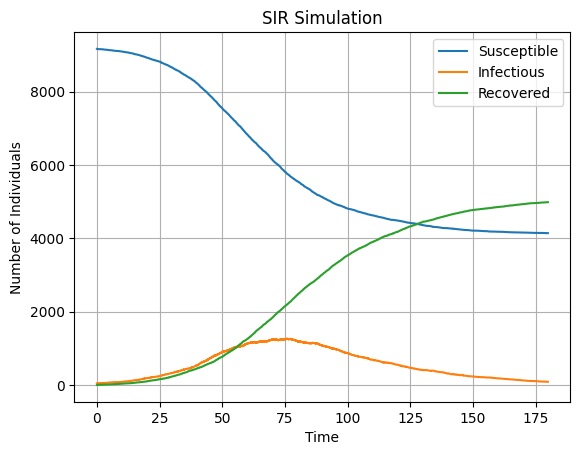

In [350]:
# Get the simulation results
t, S, I, R = unpack_sim(sim)

# Plotting the results
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infectious')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('SIR Simulation')
plt.legend()
plt.grid(True)
plt.show()

### Performance Metrics

#### Economic loss indicator

Find t_peak, the peak of infection of the epidemic simualation

In [351]:
# Define a function to get the peak of infection

def get_peak_time(I, t):

  # Index of timestamp of the peak of the infection
  max_infected_index = np.argmax(I)

  # Time of the peak of infection
  t_peak = t[max_infected_index]

  return t_peak

In [352]:
# Number of infected individuals at the peak of infection
max_infected = np.max(I) # sim.I()

# Time of the peak of infection
t_peak = get_peak_time(I, t)

print(f'The peak of infection was at time = {t_peak} days with {max_infected} infected individuals.')

The peak of infection was at time = 75.92989806801722 days with 1262 infected individuals.


Get the status of all nodes at t_peak and analyze their afiliations.

In [353]:
# Get the status of all nodes at t_peak
peak_status = sim.get_statuses(time=t_peak)
peak_status

{'0': 'S',
 '1': 'S',
 '6960': 'S',
 '6961': 'R',
 '2': 'R',
 '3': 'S',
 '6962': 'R',
 '4': 'I',
 '5': 'I',
 '7': 'I',
 '8': 'S',
 '6963': 'R',
 '6964': 'R',
 '9': 'R',
 '10': 'I',
 '6965': 'S',
 '6966': 'S',
 '11': 'S',
 '12': 'R',
 '14': 'R',
 '15': 'S',
 '16': 'R',
 '17': 'S',
 '18': 'R',
 '6967': 'S',
 '19': 'S',
 '20': 'S',
 '6968': 'S',
 '21': 'S',
 '22': 'S',
 '6969': 'R',
 '6970': 'S',
 '23': 'S',
 '24': 'R',
 '6971': 'R',
 '6972': 'S',
 '6973': 'S',
 '6974': 'R',
 '25': 'R',
 '26': 'S',
 '6975': 'S',
 '6976': 'S',
 '6977': 'S',
 '6978': 'S',
 '27': 'R',
 '28': 'S',
 '29': 'R',
 '30': 'S',
 '31': 'S',
 '6979': 'S',
 '6980': 'I',
 '32': 'R',
 '33': 'S',
 '6981': 'I',
 '6982': 'I',
 '34': 'S',
 '35': 'R',
 '36': 'R',
 '6983': 'S',
 '6984': 'S',
 '6985': 'S',
 '37': 'R',
 '38': 'I',
 '39': 'I',
 '40': 'I',
 '41': 'R',
 '6986': 'S',
 '43': 'S',
 '6987': 'S',
 '44': 'S',
 '45': 'R',
 '6988': 'S',
 '46': 'R',
 '47': 'I',
 '6989': 'S',
 '6990': 'R',
 '6991': 'S',
 '48': 'S',
 '50': 'S

Function to compute vector y for estimating the economic loss indicator at the peak of infection.

* y1 : Infected workers in agriculture and food industries
* y2 : Infected workers in industry excluding agri-food
* y3 : Infected workers in construction
* y4 : Infected workers in merchant services
* y5 : Infected workers in non-market services

In [354]:
# Define a function to return vector y
# y contains the information of the industry sector of all working class infected nodes at t_peak

def compute_vector_y(node_statuses) :

  # Initialize vector y as a zero-valued list
  y = [0, 0, 0, 0, 0]

  # Iterate all the node statuses and if infected and working add to y
  for node_key, node_status in node_statuses.items() :
    
    # Cast node_key from string to int
    node_key = int(node_key)

    # Check if node is infected
    if node_status == 'I':

      if node_key in agriculture_and_agro_food_processing :
        y[0] += 1
      elif node_key in industries_except_agro_food_processing :
        y[1] += 1
      elif node_key in construction :
        y[2] += 1
      elif node_key in market_services :
        y[3] += 1
      elif node_key in non_market_services :
        y[4] += 1

  return np.array(y)

y = compute_vector_y(peak_status)
print(y)

[ 31  75  48 131 362]


Define vector w, which represents the share in GDP (in %) for all activity branches in normal conditions.

* w1 : GDP (in %) for agriculture and food industries
* w2 : GDP (in %) for industry excluding agri-food
* w3 : GDP (in %) for construction
* w4 : GDP (in %) for merchant services
* w5 : GDP (in %) for non-market services


In [355]:
# Definition of vector w with fixed values
#w = np.array([4, 12, 6, 56, 22])
w = np.array([0.04, 0.12, 0.06, 0.56, 0.22])

Compute the weighted sum of y, which is the economic loss indicator. It can be computed as the dot product of vector y and the weights vector.

In [356]:
economic_loss = np.dot(y, w)
economic_loss

166.12

#### Number of deaths

Definition of constants

In [357]:
# Rate of death people among the infected
mortality_factor = 0.00418

Estimation of number of deaths

In [358]:
# Get the total number of recovered (or death) at the time limit
print(f'Total of recovered nodes at the end: {R[-1]}')

# Estimate the number of deaths
num_death = int( R[-1] * mortality_factor )
print(f'Total of dead nodes at the end: {num_death}')

Total of recovered nodes at the end: 4987
Total of dead nodes at the end: 20
